In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/eml_dataset.csv', sep=';')

Статистика по собранным данным

In [3]:
df.info()  # Типы данных, пропуски
df['Mark'].value_counts()  # Распределение спама/не спама

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1600 non-null   int64 
 1   From        1599 non-null   object
 2   To          1544 non-null   object
 3   Date        1599 non-null   object
 4   Text        1583 non-null   object
 5   Mark        1600 non-null   object
dtypes: int64(1), object(5)
memory usage: 75.1+ KB


Mark
spam        1000
not spam     600
Name: count, dtype: int64

C:\Users\KTHack\AppData\Local\Temp\ipykernel_2720\1575968871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_counts.index, y=spam_counts.values, palette='coolwarm')


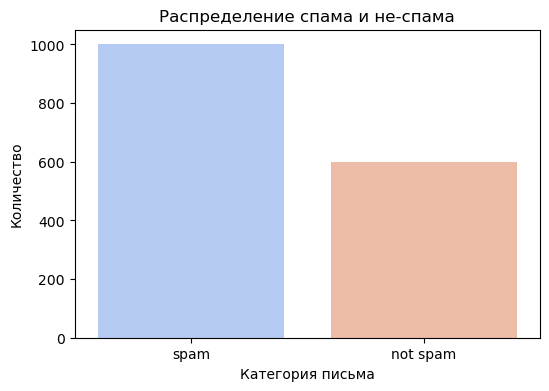

,Unnamed: 0,From,To,Date,Text,Mark
count,1600.00000,1599,1544,1599,1583,1600
unique,NaN,1094,550,1551,1455,2
top,NaN,boingboing <rssfeeds@example.com>,yyyy@example.com,"Fri, 29 Mar 2002 05:01:01 +0000",dear paypal member account randomly flagged sy...,spam
freq,NaN,31,142,4,8,1000
mean,799.50000,NaN,NaN,NaN,NaN,NaN
std,462.02453,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN
25%,399.75000,NaN,NaN,NaN,NaN,NaN
50%,799.50000,NaN,NaN,NaN,NaN,NaN
75%,1199.25000,NaN,NaN,NaN,NaN,NaN


In [4]:
# Количество спам/не-спам сообщений
spam_counts = df['Mark'].value_counts()

# Визуализация распределения
plt.figure(figsize=(6, 4))
sns.barplot(x=spam_counts.index, y=spam_counts.values, palette='coolwarm')
plt.xlabel('Категория письма')
plt.ylabel('Количество')
plt.title('Распределение спама и не-спама')
plt.show()

# Выведем числовую статистику
df.describe(include='all')

C:\Users\KTHack\AppData\Local\Temp\ipykernel_2720\2286027826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_senders.index, x=top_senders.values, palette='viridis')


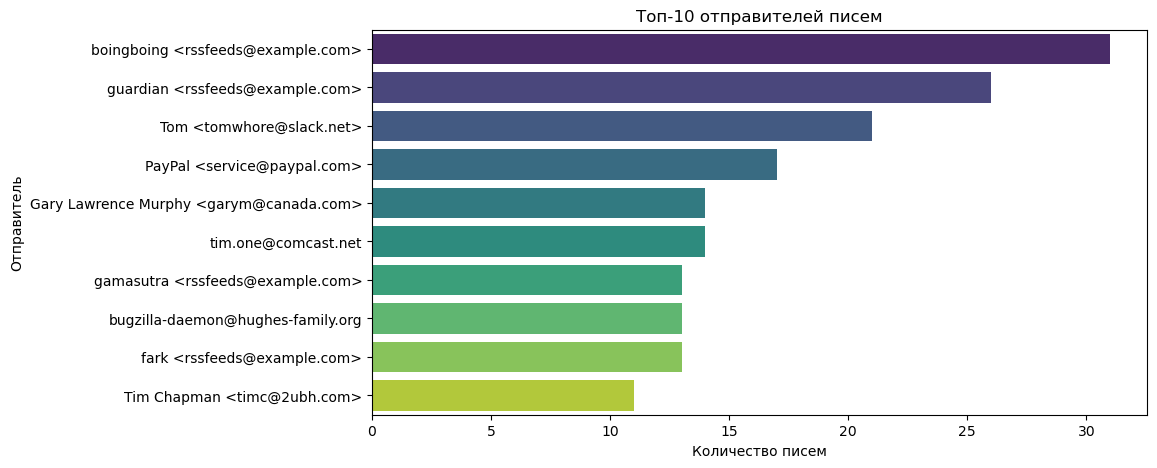

In [5]:
# Топ-10 отправителей
top_senders = df['From'].value_counts().head(10)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(y=top_senders.index, x=top_senders.values, palette='viridis')
plt.xlabel('Количество писем')
plt.ylabel('Отправитель')
plt.title('Топ-10 отправителей писем')
plt.show()

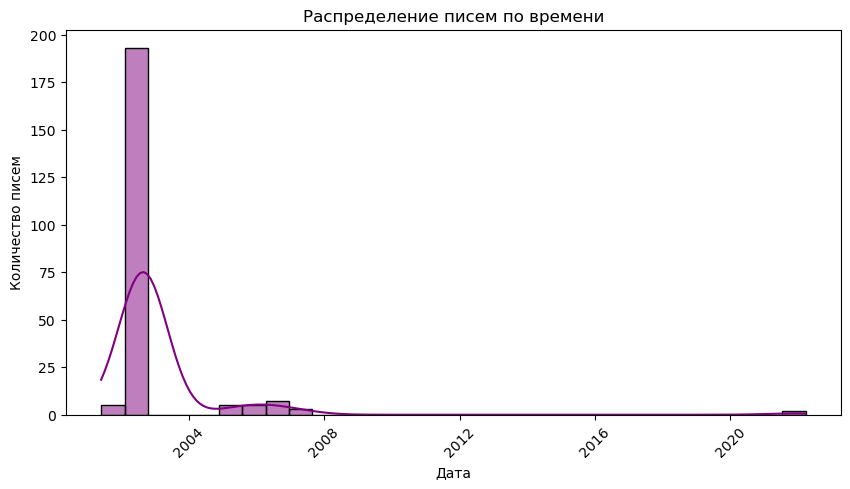

In [7]:
# Преобразуем дату в формат datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Убираем NaN и строим график
df.dropna(subset=['Date'], inplace=True)

plt.figure(figsize=(10, 5))
sns.histplot(df['Date'], bins=30, kde=True, color='purple')
plt.xlabel('Дата')
plt.ylabel('Количество писем')
plt.title('Распределение писем по времени')
plt.xticks(rotation=45)
plt.show()
